In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
koi3678 = pd.read_csv('./TTVs/koi3678.csv')
koi3762 = pd.read_csv('./TTVs/koi3762.csv')


print(koi3762.keys())

Index(['Unnamed: 0', 'tts_median [KBJD]', 'tts_err lower [days]',
       'tts_err upper [days]', 'ttvs_median [min] ', 'ttvs_err lower [min]',
       'ttvs_err upper [min]', 'P_median [days]', 't0_median [KBJD]'],
      dtype='object')


Text(0.5, 0, 'time [KBJD]')

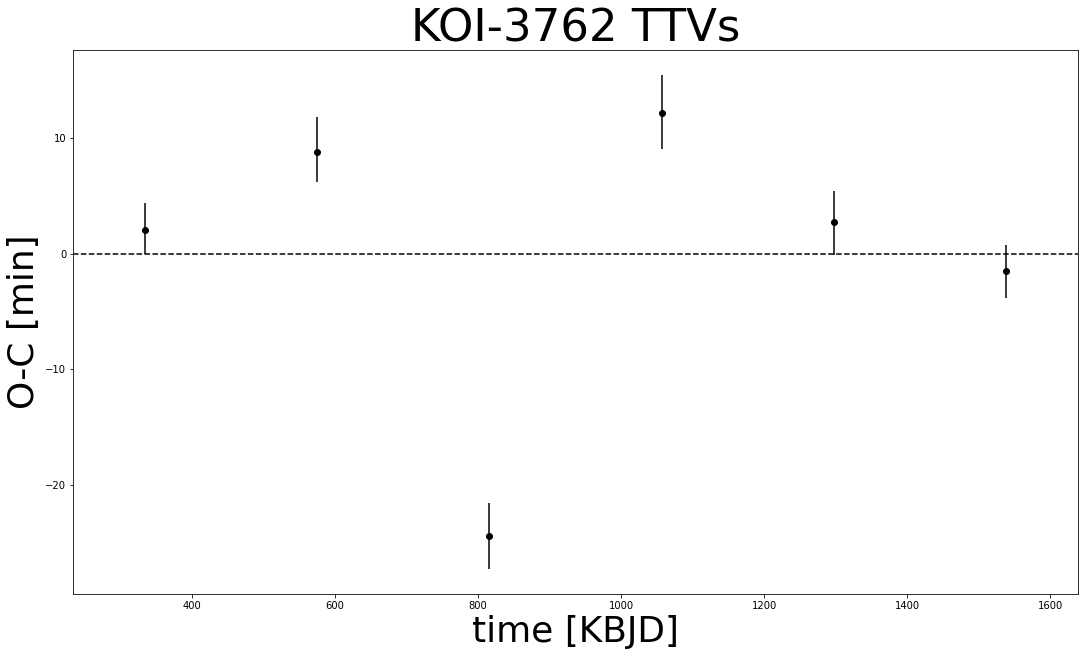

In [35]:
plt.figure(figsize = [18,10])
plt.errorbar(koi3762['tts_median [KBJD]'], koi3762['ttvs_median [min] '], 
             yerr=np.array([koi3762['ttvs_err lower [min]'], koi3762['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.hlines(0, 0, 2*np.max(koi3762['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3762['tts_median [KBJD]']) - 100, np.max(koi3762['tts_median [KBJD]']) + 100)

plt.title('KOI-3762 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)



In [100]:
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters 
    "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))

    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, 
            "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

0.009969858379959944


Text(0, 0.5, 'power')

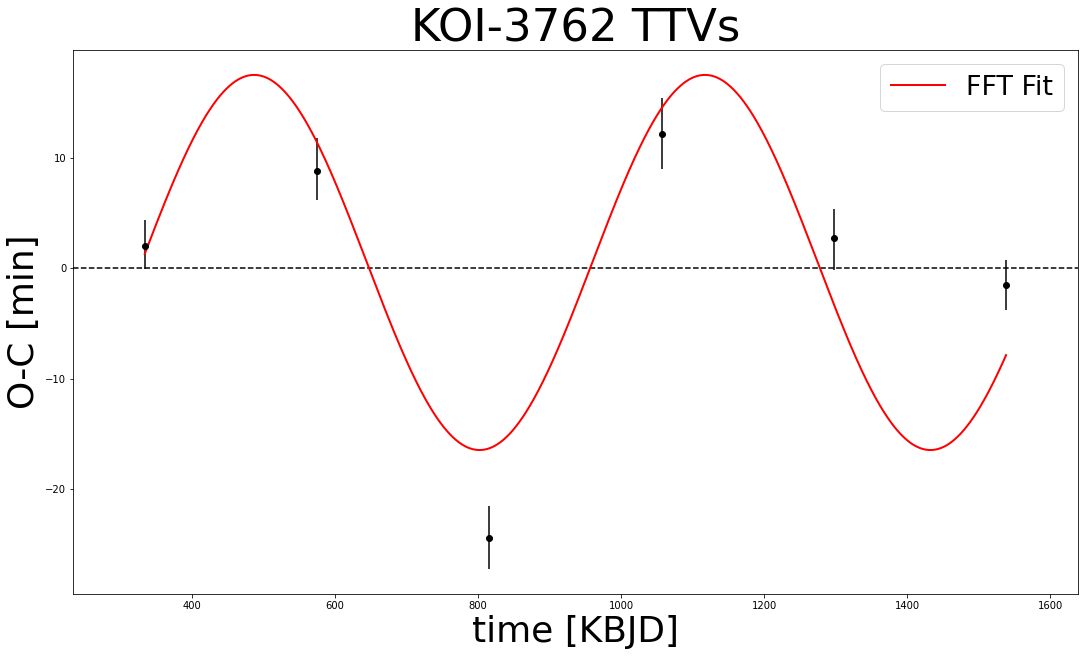

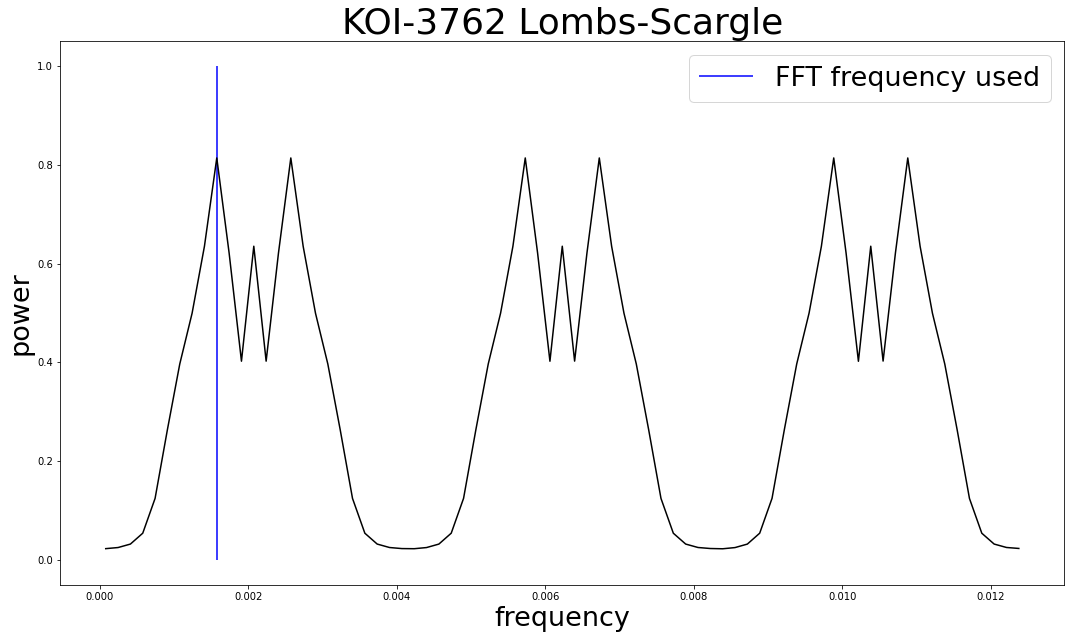

In [112]:
t_plot = np.linspace(np.min(koi3762['tts_median [KBJD]']), np.max(koi3762['tts_median [KBJD]']), 10000)

res = fit_sin(koi3762['tts_median [KBJD]'], koi3762['ttvs_median [min] '])


plt.figure(figsize = [18,10])
plt.errorbar(koi3762['tts_median [KBJD]'], koi3762['ttvs_median [min] '], 
             yerr=np.array([koi3762['ttvs_err lower [min]'], koi3762['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.plot(t_plot, res["fitfunc"](t_plot), "r-", linewidth=2, label = 'FFT Fit')




plt.hlines(0, 0, 2*np.max(koi3762['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3762['tts_median [KBJD]']) - 100, np.max(koi3762['tts_median [KBJD]']) + 100)

plt.legend(fontsize = 27)

plt.title('KOI-3762 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)


plt.savefig('koi3762_fft_ttvs.pdf')


plt.figure(figsize = [18,10])
from astropy.timeseries import LombScargle

frequency, power = LombScargle(koi3762['tts_median [KBJD]'], koi3762['ttvs_median [min] ']).autopower()
plt.plot(frequency, power, 'k')
plt.vlines(res["freq"], 0, 1, 'b', label = 'FFT frequency used')

plt.legend(fontsize = 27)

plt.title('KOI-3762 Lombs-Scargle', fontsize = 36)
plt.xlabel('frequency', fontsize = 27)
plt.ylabel('power', fontsize = 27)


Text(0.5, 0, 'time [KBJD]')

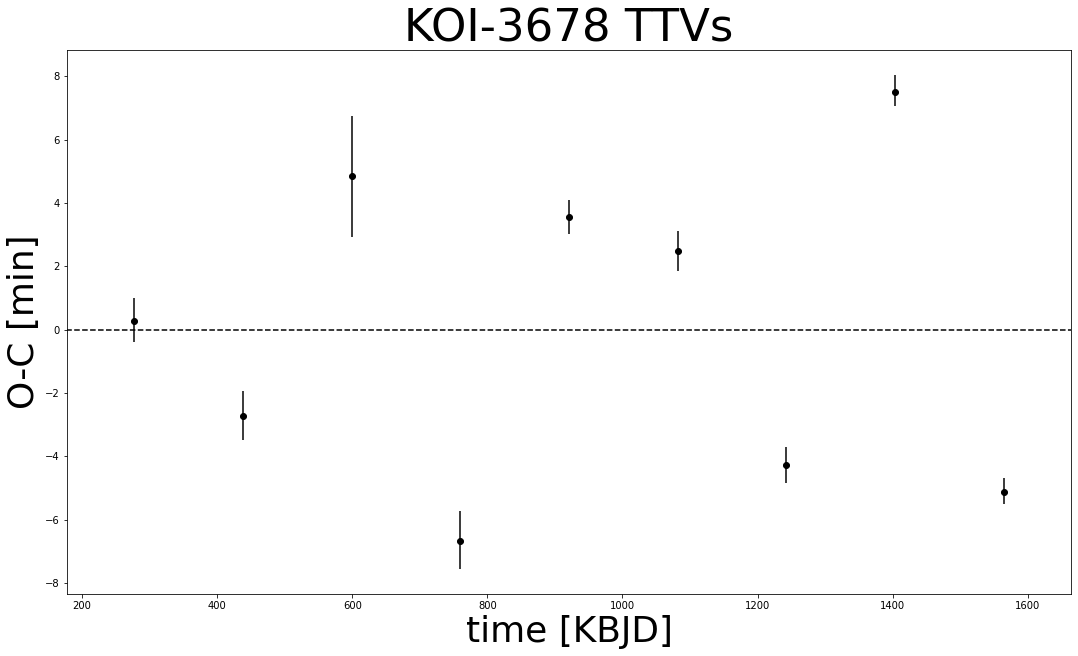

In [36]:
plt.figure(figsize = [18,10])
plt.errorbar(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '], 
             yerr=np.array([koi3678['ttvs_err lower [min]'], koi3678['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.hlines(0, 0, 2*np.max(koi3678['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3678['tts_median [KBJD]']) - 100, np.max(koi3678['tts_median [KBJD]']) + 100)


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)





0.023779537945514427


Text(0, 0.5, 'power')

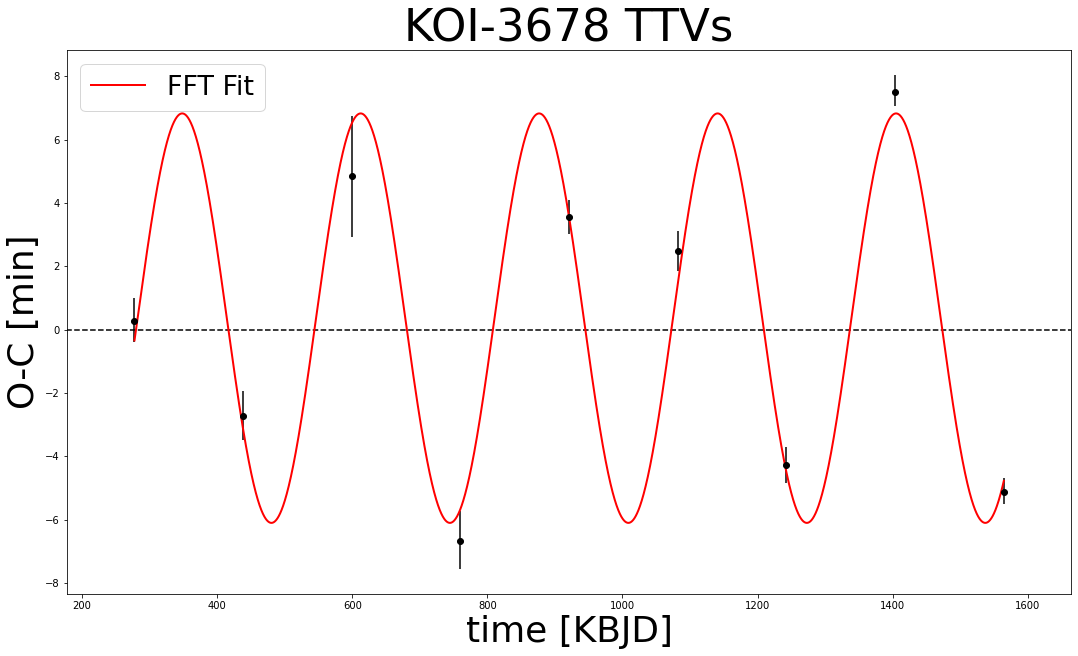

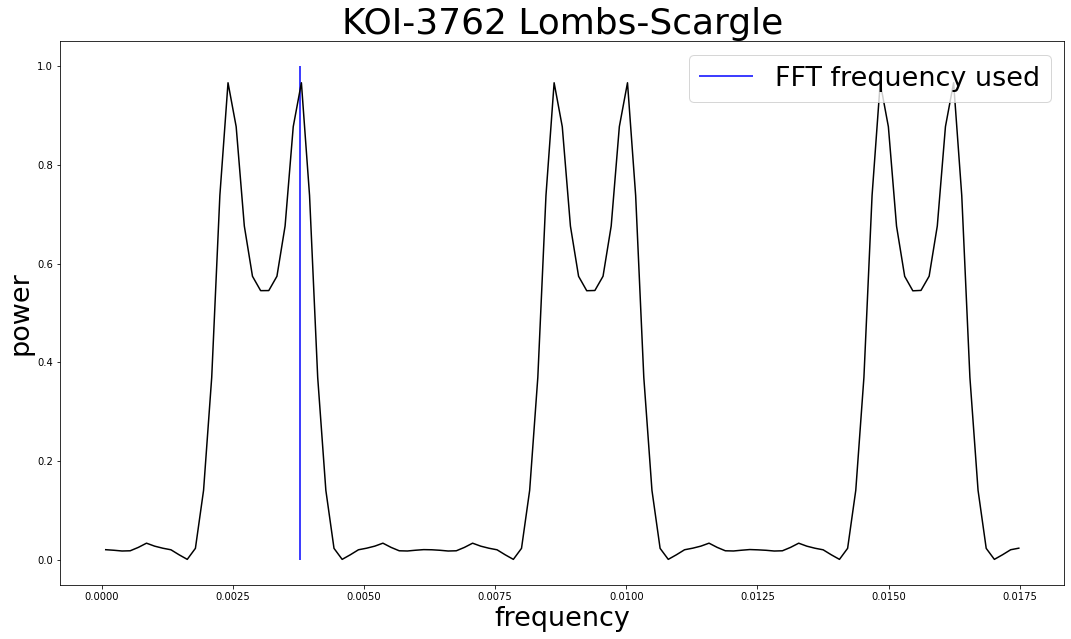

In [115]:
t_plot = np.linspace(np.min(koi3678['tts_median [KBJD]']), np.max(koi3678['tts_median [KBJD]']), 10000)

res = fit_sin(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '])

plt.figure(figsize = [18,10])
plt.errorbar(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '], 
             yerr=np.array([koi3678['ttvs_err lower [min]'], koi3678['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.plot(t_plot, res["fitfunc"](t_plot), "r-", linewidth=2, label = 'FFT Fit')

plt.legend(fontsize = 27)


plt.hlines(0, 0, 2*np.max(koi3678['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3678['tts_median [KBJD]']) - 100, np.max(koi3678['tts_median [KBJD]']) + 100)


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)


plt.savefig('koi3678_fft_ttvs.pdf')



plt.figure(figsize = [18,10])
from astropy.timeseries import LombScargle

frequency, power = LombScargle(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] ']).autopower()
plt.plot(frequency, power, 'k')
plt.vlines(res["freq"], 0, 1, 'b', label = 'FFT frequency used')

plt.legend(fontsize = 27)

plt.title('KOI-3762 Lombs-Scargle', fontsize = 36)
plt.xlabel('frequency', fontsize = 27)
plt.ylabel('power', fontsize = 27)

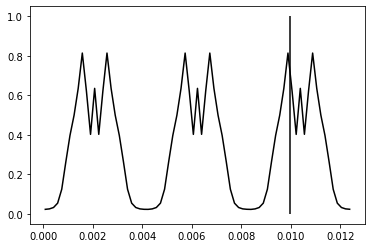